# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 30th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. You should provide solutions to the exercises with the following titles from **Part 1** 

* *Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook*

* *WS edition*

And from **Part 2**

* *BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network. 


# Exercise Part 1

> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.
>
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

Random networks' degree distribution follow the Poisson distribution. However, this is not the case for real networks. Also, random networks local clustering coefficient is independent of the node's degree. However, measuring the clustering coefficient of
Internet or protein interactions shows that C(k) decreases with k and dependent on N. Moreover, in theory if <k> > lnN, then the network should be broken into isolated clusters, which is true for the Actor network, but for most real life networks it is false (e.g. the Internet, power grid, yeast protein interaction).

Subsciritcal regime, where 0 < <k> < 1 and the network is fragmented into small clusters, which sizes follows the exponential distribution.
 Critical point, where <k> = 1. In this there are a lot of small clusters (which are mainly trees), and a giant component (which can have loops in it).
 superscritical regime, where <k> > 1. In this there can be a few small cluster (mainly trees), and a giant component with loops in it.
 Connected regime, where <k> > lnN and the giant component swallows all the small clusters.

The problem with random networks not capturing C(k) for real networks as it fails to explain why nodes with high <k> have a smaller C(k) than nodes with low <k>. In contrast in random networks C(k) is not dependent from <k>.


> *Exercises*: WS edition.
>
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one.
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

In [3]:
import networkx as nx
## Generating 3 graphs with N=500, <k>=4 and p= 0, 0.1 and 1, using`nx.watts_strogatz_graph`. Calculating the average shortest path length <d> for each one.

probabilities = [0, 0.1, 1]
networks = []

print("Average shortest path lengths for the different probabilities:")
for i in range (len(probabilities)):
    g = nx.watts_strogatz_graph(500, 4, probabilities[i])
    networks.append(g)
    print("For probability ", probabilities[i] , " the average shortest path length is: ", nx.average_shortest_path_length(g))

Average shortest path lengths for the different probabilities:
For probability  0  the average shortest path length is:  62.875751503006015
For probability  0.1  the average shortest path length is:  7.569891783567134
For probability  1  the average shortest path length is:  4.767150300601203


Describe what happens to the network when p = 1:
As p in Watto-Strogatz Model is the probability for each link to rewire to a randomly chosen node, so if p=1 it means that the network becomes a random network. (As the links are random.)

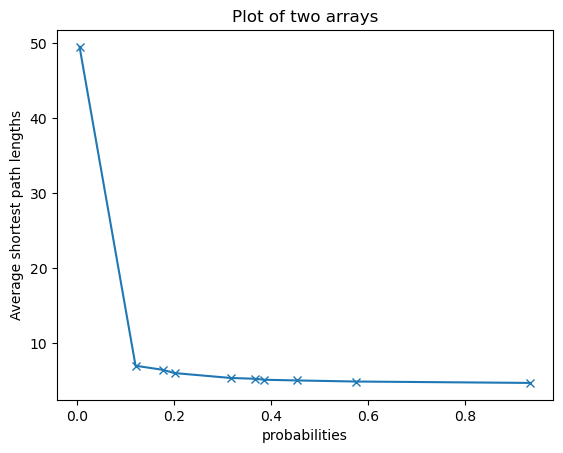

In [8]:
import random
import matplotlib.pyplot as plt
##Generating a lot of networks with different values of p.

random_probabilities = [random.random() for _ in range(10)]
random_probabilities.sort()
average_shortest_path_lengths = []
for p in random_probabilities:
    g = nx.watts_strogatz_graph(500, 4, p)
    average_shortest_path_lengths.append(nx.average_shortest_path_length(g))

plt.plot(random_probabilities, average_shortest_path_lengths, marker='x')   # line plot with points
plt.xlabel("probabilities")
plt.ylabel("Average shortest path lengths")
plt.title("Plot of two arrays")
plt.show()

0.001‹p‹0.01 is the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

We can also see that the average shortest path is shorter and shorter with probabilities which are closer to 1.


In [11]:
import numpy as np

N = 500
k = 4
p =[0, 0.01, 0.03, 0.05, 0.1, 0.2]
dict = {}
standard_deviations = {}

for i in p:
    average_shortest_path_lengths_with_d = []
    for j in range(50):
        g = nx.watts_strogatz_graph(N, k, i)
        average_shortest_path_lengths_with_d.append(nx.average_shortest_path_length(g))
    standard_deviations[i] = np.std(average_shortest_path_lengths_with_d)
    dict[i] = np.mean(average_shortest_path_lengths_with_d)

print(standard_deviations)

{0: np.float64(7.105427357601002e-15), 0.01: np.float64(7.529342678246769), 0.03: np.float64(1.1136408935249347), 0.05: np.float64(0.7276557487091356), 0.1: np.float64(0.2600409730024283), 0.2: np.float64(0.09945945233491893)}


In [19]:
keys = sorted(dict.keys())
values = [dict[k] for k in keys]
y_error = [standard_deviations[k] for k in keys]

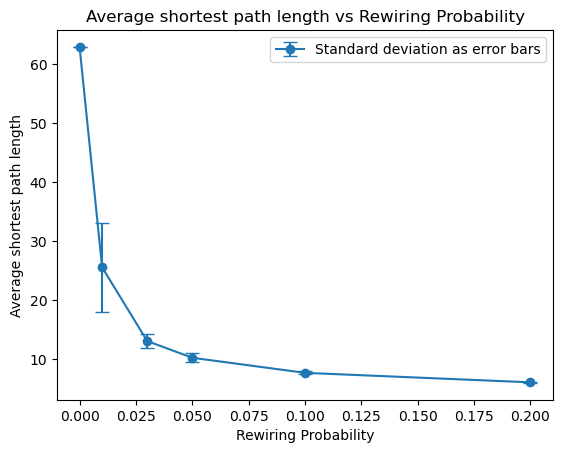

In [23]:

# Plot with error bars
plt.errorbar(keys, values, yerr=y_error, fmt='-o', capsize=5, label='Standard deviation as error bars')
plt.xlabel("Rewiring Probability")
plt.ylabel("Average shortest path length")
plt.title("Average shortest path length vs Rewiring Probability")
plt.legend()
plt.show()

On this plot we can see the relationship between the rewiring probability. On the y-axis you can see the average shortest path lengths of random generated graphs with the rewiring probability from the x-axis. For the error bars we used the standard deviation of the average shortest path lengths. As we can see the average shortest path length decreases very quickly even with a little bit of rewiring.

# Part 2

In [5]:
# We made a graph and added two nodes and an edge between them. The name of the nodes will be integers from 0 to n-1.
BA_Graph = nx.Graph()
BA_Graph.add_edge(0, 1)

In [6]:
# We then added 98 more nodes. Each new node has one edge that connects to the previous nodes. The node to which the new node connects is chosen randomly by their proportion to their degree. This means that in a way that if a node has more connection, there is a bigger change that the new node will connect to that node.

import random
for i in range (2, 100):
    edges = list(BA_Graph.edges()) # list of all edges in the current graph
    flat_edges = [node for edge in edges for node in edge] #I flatten the list of edges, so that each node appears as many times as its degree
    new_node = i # name of the new node
    connected_node = random.choice(flat_edges) # we chosed a random node from the flat_edges list
    BA_Graph.add_edge(new_node, connected_node)

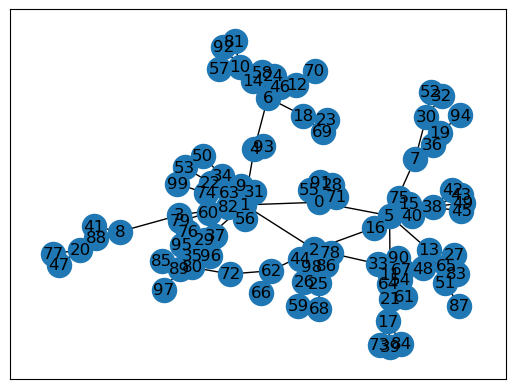

In [7]:
# visualizing the network
nx.draw_networkx(BA_Graph)

In [8]:
# I add more nodes, so that in total there are 5000 nodes in the network in the same way as above
for i in range (101, 5000):
    edges = list(BA_Graph.edges())
    flat_edges = [node for edge in edges for node in edge]
    new_node = i
    connected_node = random.choice(flat_edges)
    BA_Graph.add_edge(new_node, connected_node)

In [9]:
degrees = dict(BA_Graph.degree())
min_degree = min(degrees.values())
max_degree = max(degrees.values())

print("The minimum degree is: ", min_degree)
print("The maximum degree is: ", max_degree)

The minimum degree is:  1
The maximum degree is:  95


In [13]:
# We make a histogram of the degrees_array (degree distribution)
import numpy as np
degrees_array = np.array(list(degrees.values()))
degrees_histogram_linear, degrees_bin_linear = np.histogram(degrees_array, bins=(max_degree - min_degree + 1)) #for bins we used the range of degrees between minimum and maximum degree

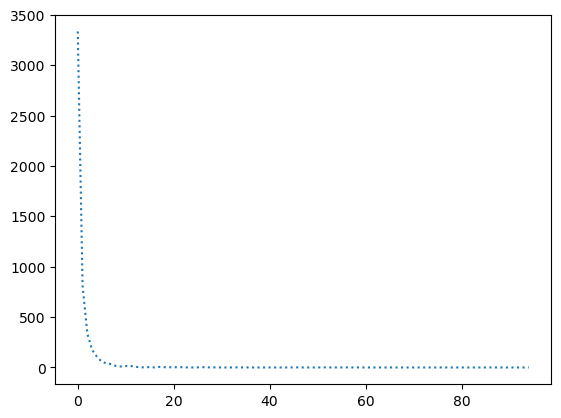

In [14]:
# We plot the degree distribution on a linear scale
import matplotlib.pyplot as plt
plt.plot(degrees_histogram_linear, linestyle = 'dotted')
plt.show()

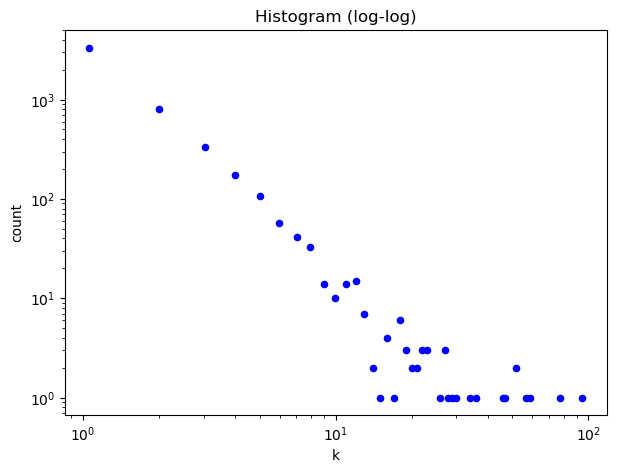

In [15]:
# We plot the degree distribution on a log-log scale
degrees_histogram_log, bin_log = np.histogram(degrees_array, bins='auto') # 'auto' lets numpy choose the bin size automatically
bin_centers = 0.5 * (bin_log[1:] + bin_log[:-1])
plt.figure(figsize=(7,5))
plt.scatter(bin_centers, degrees_histogram_log, s=20, c="blue", marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("k")
plt.ylabel("count")
plt.title("Histogram (log-log)")
plt.show()

# Assignment 1.2: Stats and visualization of the Rock Music Network

This second part requires you to have built the network of Rock Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Explain your process in words*

* *Simple network statistics and analysis*.

  * **Note related to this and the following exercise**. It is nice to have the dataset underlying the statistics and visualization available when we grade. Therefore, I recommend that you create a small *network dataset*, which is simply your graph stored in some format that you like (since it's only a few hundred nodes and a few thousand edges, it won't take up a lot of space). You can then place that network one of your group members' GitHub account (or some other server that's available online) and have your Jupyter Notebook fetch that dataset when it runs. (It's OK to use an LLM for help with setting this up, if it seems difficult). 

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.